<a href="https://colab.research.google.com/github/daham-13/CM2604-Coursework/blob/main/CM2604_Coursework_2330906.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [91]:
#import pandas
import pandas as pd

#Fetch data
url = "https://raw.githubusercontent.com/daham-13/CM2604-Coursework/refs/heads/main/Data/bank-additional/bank-additional-full.csv"
data = pd.read_csv(url, sep=";")
print(data.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

# Data Preprocessing

### Data Overview

In [92]:
#Basic information of data

# General Information
print(data.info())  # Data types, non-null counts, and memory usage

# Summary Statistics
print(data.describe(include="all"))  # Summary for numerical and categorical columns

# Shape of the Data
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [93]:
#Null values

# Replace "unknown" with NaN to treat them as missing values
data = data.replace("unknown", pd.NA)

#Finding the total number of null values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

missing_presentage = (data.isnull().sum() / len(data)) * 100
print("\nMissing Values Percentage:\n", missing_presentage)

Missing Values:
 age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Missing Values Percentage:
 age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price

In [94]:
#Duplicate Data

# Count Duplicate Rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 12


y
no     36548
yes     4640
Name: count, dtype: int64


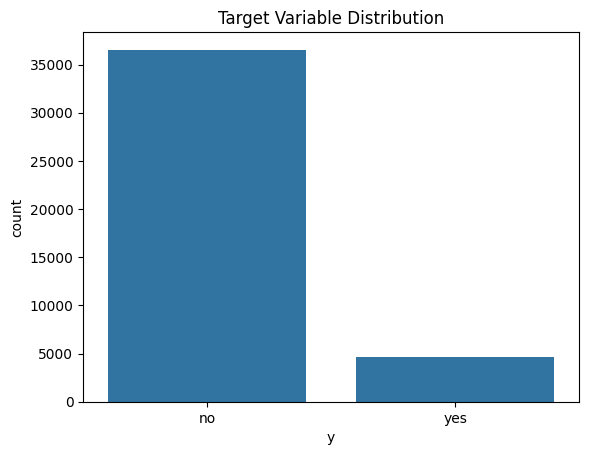

In [95]:
#Target Value Distribution

# Unique Value Counts
print(data["y"].value_counts())

# Visualize Distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x="y")
plt.title("Target Variable Distribution")
plt.show()


Numerical Columns:
 Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188

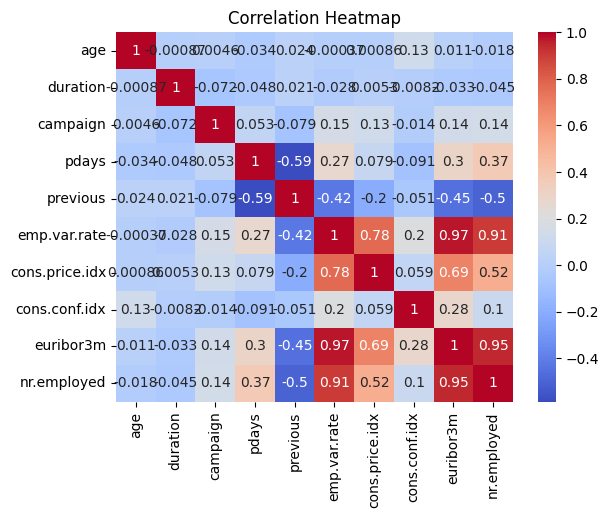

In [96]:
#Feature Analization

# Identify numerical columns
numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns
print("Numerical Columns:\n", numerical_columns)

# Summary Statistics
print(data[numerical_columns].describe())

# Correlation Heatmap
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [97]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=["object", "category"]).columns
print("Categorical Columns:\n", categorical_columns)

# Unique values and frequency
for col in categorical_columns:
    print(f"{col}: {data[col].nunique()} unique values")
    print(data[col].value_counts())
    print("\n")


Categorical Columns:
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')
job: 11 unique values
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64


marital: 3 unique values
marital
married     24928
single      11568
divorced     4612
Name: count, dtype: int64


education: 7 unique values
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: count, dtype: int64


default: 2 unique values
default
no     32588
yes        3
Name: count, dtype: int64


housing: 2 unique values
housing
yes    21576
no   

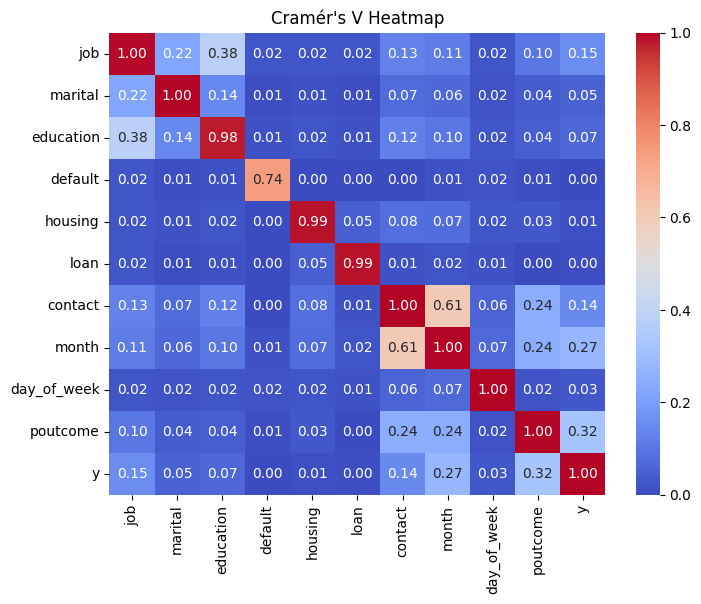

In [98]:
#Cramér's V correlation for categorical variables
import numpy as np
from scipy.stats import chi2_contingency

# Function to calculate C
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return np.sqrt(chi2 / (len(x) * (min(contingency_table.shape) - 1)))

# Create an empty correlation matrix
corr_matrix = pd.DataFrame(np.zeros((len(categorical_columns), len(categorical_columns))),
                           columns=categorical_columns, index=categorical_columns)

# Fill the correlation matrix with Cramér's V values
for i in range(len(categorical_columns)):
    for j in range(i, len(categorical_columns)):
        corr_matrix.iloc[i, j] = cramers_v(data[categorical_columns[i]], data[categorical_columns[j]])
        corr_matrix.iloc[j, i] = corr_matrix.iloc[i, j]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=0, vmax=1)
plt.title("Cramér's V Heatmap")
plt.show()


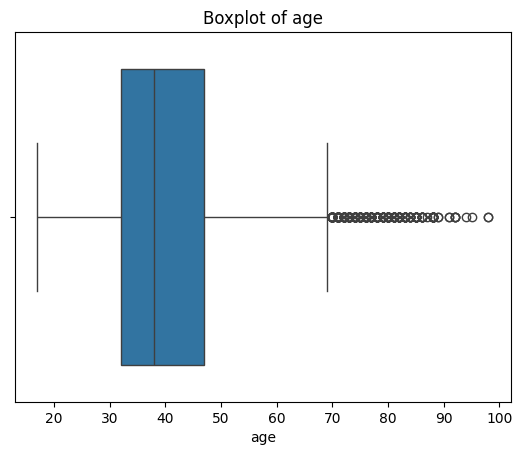

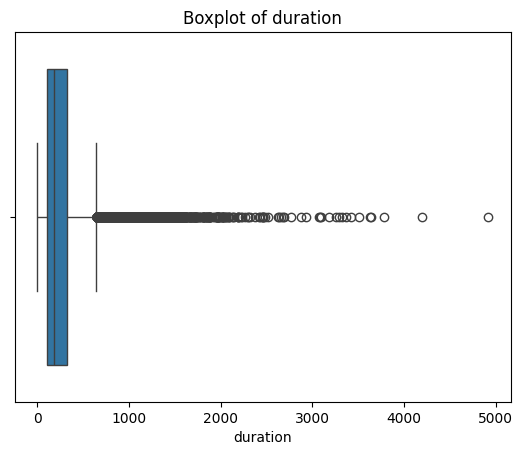

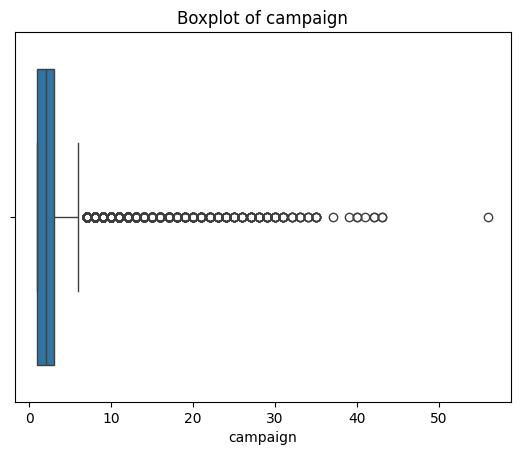

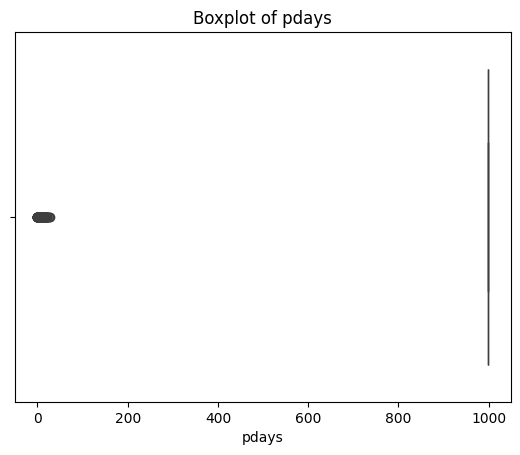

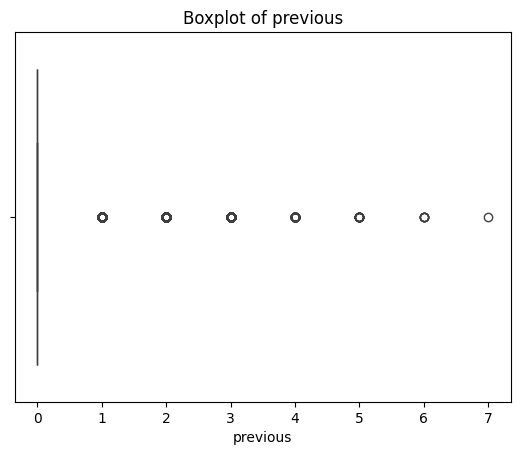

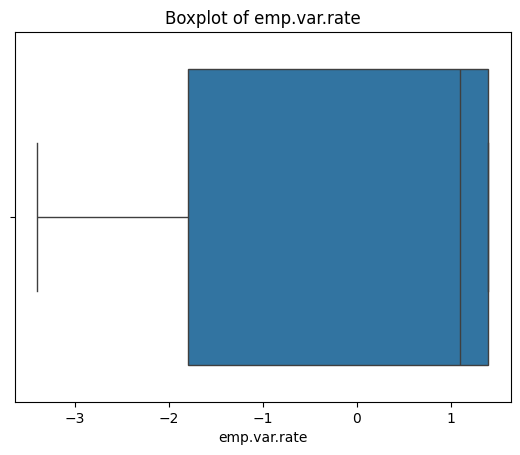

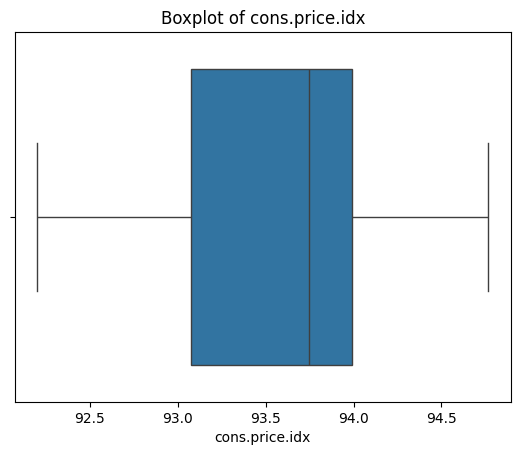

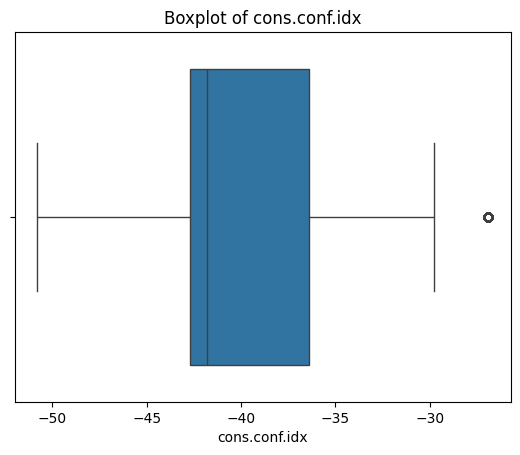

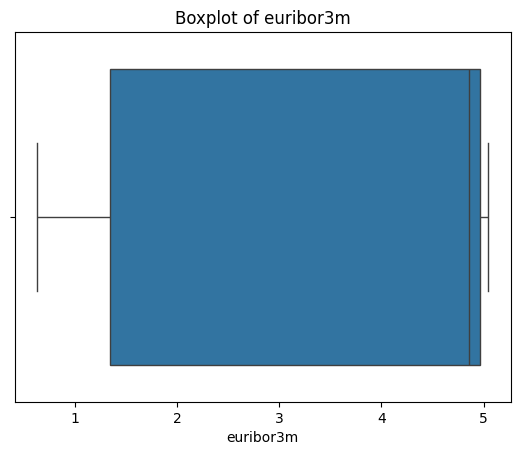

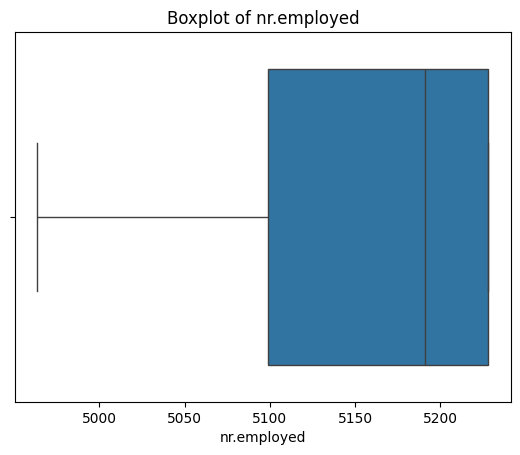

In [99]:
#Identifying Outliers

for col in numerical_columns:
  sns.boxplot(data=data, x=col)
  plt.title(f"Boxplot of {col}")
  plt.show()

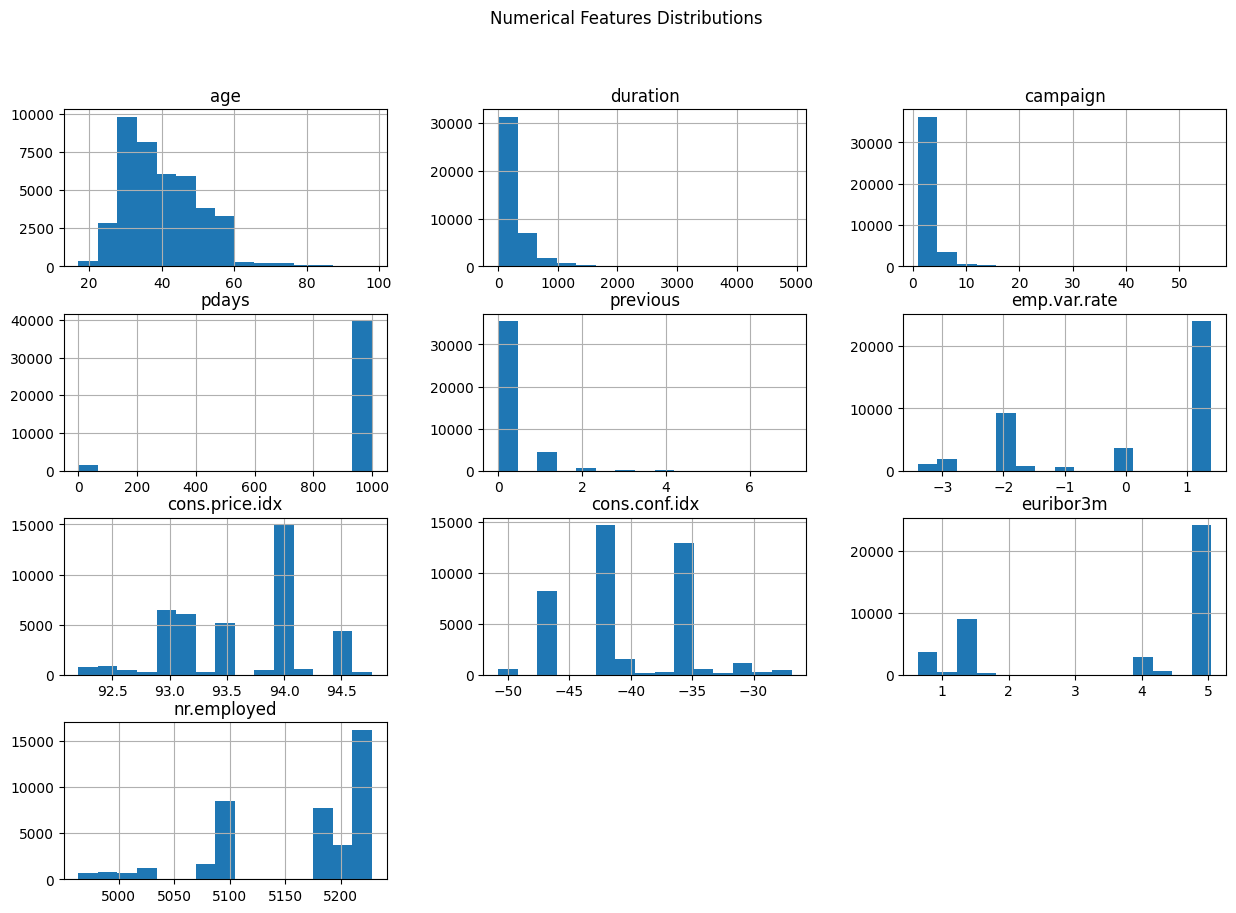

In [100]:
#Visualize Feature Distributions

# Histogram for numerical columns
data[numerical_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle("Numerical Features Distributions")
plt.show()


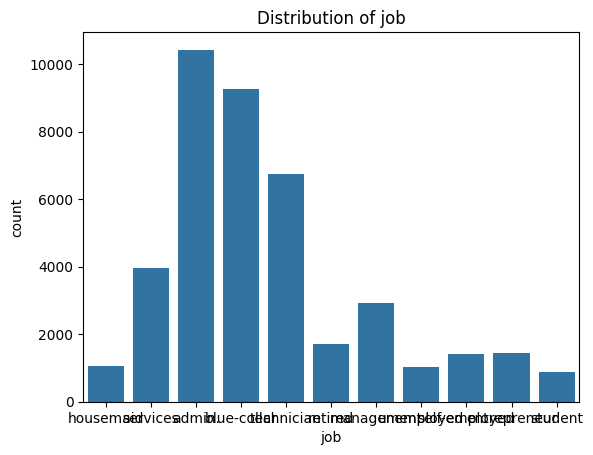

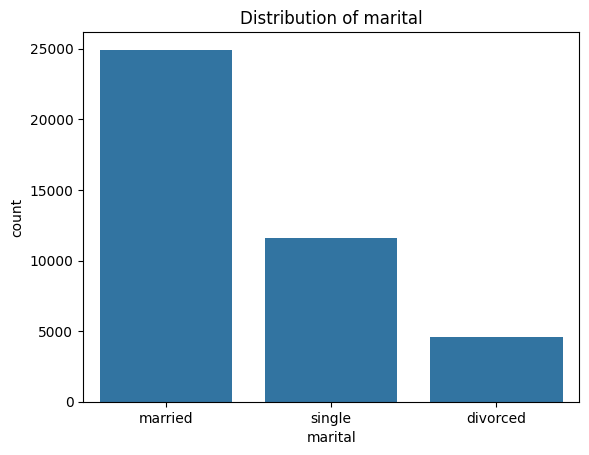

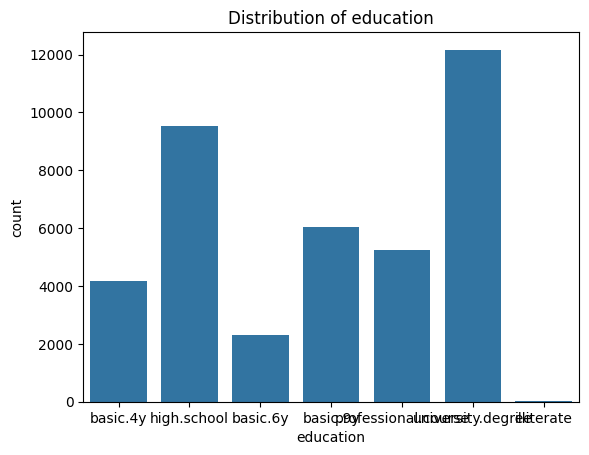

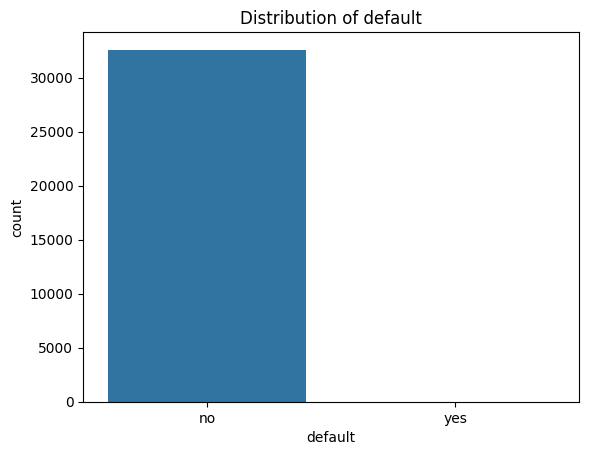

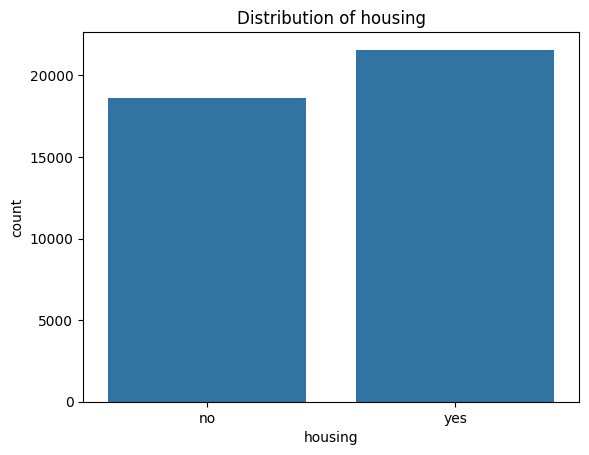

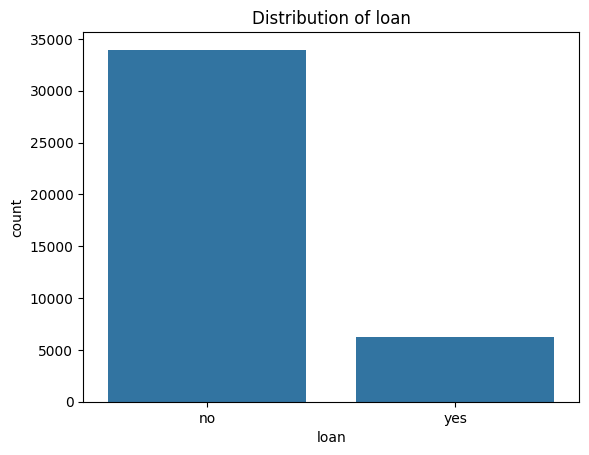

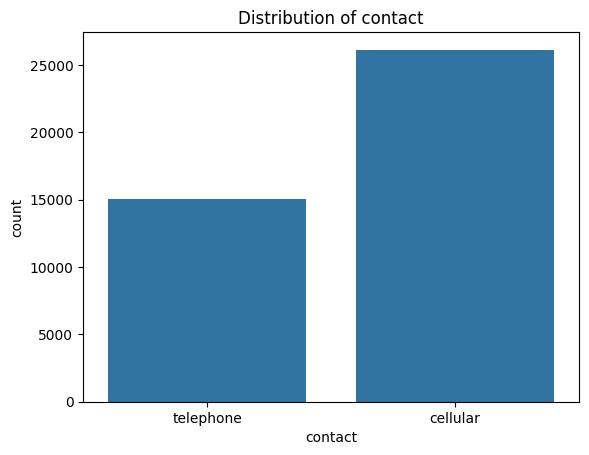

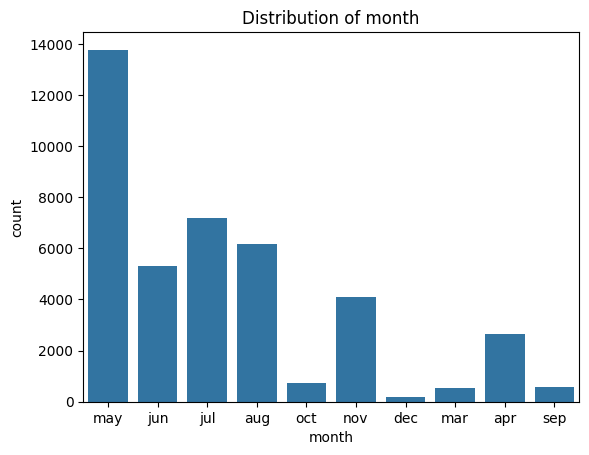

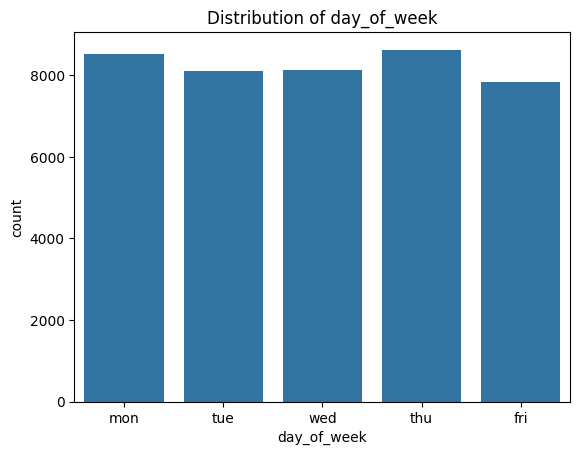

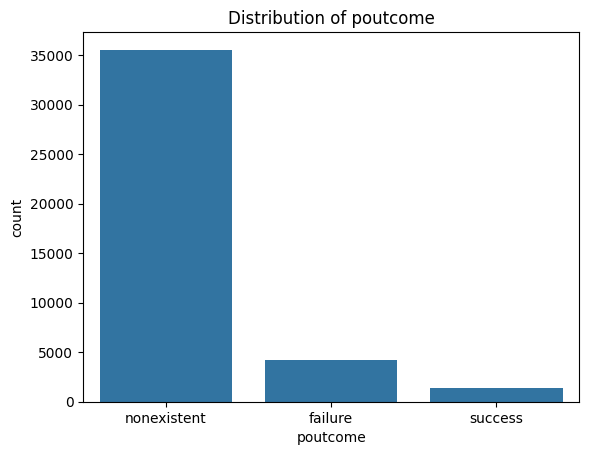

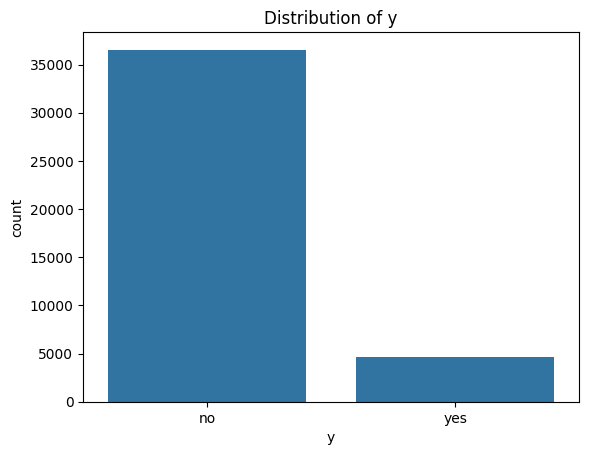

In [101]:
# Bar plots for categorical columns
for col in categorical_columns:
    sns.countplot(data=data, x=col)
    plt.title(f"Distribution of {col}")
    plt.show()

In [102]:
# Imbalance Ratio
class_distribution = data["y"].value_counts(normalize=True) * 100
print("Class Distribution (%):\n", class_distribution)


Class Distribution (%):
 y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


### Preprocess

Since except default all the other features with null values are less than 5% simply droping those rows

In [103]:
# Columns to drop based on low percentage of missing values
columns_to_check = ['job', 'marital', 'education', 'housing', 'loan']

# Drop rows where any of the selected columns have null values
df_cleaned = data.dropna(subset=columns_to_check)

print("Cleaned DataFrame (rows with nulls in specified columns dropped):")
print(df_cleaned.info())

#Null values

#Finding the total number of null values
missing_values = df_cleaned.isnull().sum()
print("Missing Values:\n", missing_values)

missing_presentage = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
print("\nMissing Values Percentage:\n", missing_presentage)
print((-1*(len(df_cleaned)-len(data))/len(data)) * 100)

Cleaned DataFrame (rows with nulls in specified columns dropped):
<class 'pandas.core.frame.DataFrame'>
Index: 38245 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38245 non-null  int64  
 1   job             38245 non-null  object 
 2   marital         38245 non-null  object 
 3   education       38245 non-null  object 
 4   default         30488 non-null  object 
 5   housing         38245 non-null  object 
 6   loan            38245 non-null  object 
 7   contact         38245 non-null  object 
 8   month           38245 non-null  object 
 9   day_of_week     38245 non-null  object 
 10  duration        38245 non-null  int64  
 11  campaign        38245 non-null  int64  
 12  pdays           38245 non-null  int64  
 13  previous        38245 non-null  int64  
 14  poutcome        38245 non-null  object 
 15  emp.var.rate    38245 non-null  float64
 16  cons.price.idx 

In [104]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['job'], drop_first=True)
df_cleaned = pd.get_dummies(df_cleaned, columns=['marital'], drop_first=True)

from sklearn.preprocessing import LabelEncoder

education_order = [
    'illiterate', 'basic.4y', 'basic.6y', 'basic.9y',
    'high.school', 'professional.course', 'university.degree'
]
df_cleaned['education'] = df_cleaned['education'].apply(lambda x: education_order.index(x))

df_cleaned['housing'] = df_cleaned['housing'].map({'yes': 1, 'no': 0})
df_cleaned['loan'] = df_cleaned['loan'].map({'yes': 1, 'no': 0})
df_cleaned = pd.get_dummies(df_cleaned, columns=['month'], drop_first=True)
df_cleaned = pd.get_dummies(df_cleaned, columns=['day_of_week'], drop_first=True)
df_cleaned = pd.get_dummies(df_cleaned, columns=['poutcome'], drop_first=True)
df_cleaned = pd.get_dummies(df_cleaned, columns=['contact'], drop_first=True)
df_cleaned['y'] = df_cleaned['y'].map({'yes': 1, 'no': 0})
df_cleaned['default'] = df_cleaned['default'].map({'yes': 1, 'no': 0})

In [105]:
#Dataset for random forest

data_copy = df_cleaned.copy()

# Drop the 'default' column
data_copy.drop("default", axis=1, inplace=True)

# Split

In [106]:
print(df_cleaned.info())
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_cleaned.drop("y", axis=1)  # Replace 'target' with your target column name
y = df_cleaned["y"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Separate features and target for data_copy
X_copy = data_copy.drop("y", axis=1)  # Replace 'target' with your target column name
y_copy = data_copy["y"]

# Split into training and testing sets
X_train_copy, X_test_copy, y_train_copy, y_test_copy = train_test_split(X_copy, y_copy, test_size=0.2, random_state=42)


<class 'pandas.core.frame.DataFrame'>
Index: 38245 entries, 0 to 41187
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   38245 non-null  int64  
 1   education             38245 non-null  int64  
 2   default               30488 non-null  float64
 3   housing               38245 non-null  int64  
 4   loan                  38245 non-null  int64  
 5   duration              38245 non-null  int64  
 6   campaign              38245 non-null  int64  
 7   pdays                 38245 non-null  int64  
 8   previous              38245 non-null  int64  
 9   emp.var.rate          38245 non-null  float64
 10  cons.price.idx        38245 non-null  float64
 11  cons.conf.idx         38245 non-null  float64
 12  euribor3m             38245 non-null  float64
 13  nr.employed           38245 non-null  float64
 14  y                     38245 non-null  int64  
 15  job_blue-collar       38

# Train

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train Random Forest on original data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate
accuracy_data = accuracy_score(y_test, y_pred)
print("Accuracy on original data (with 'default'):", accuracy_data)


# Train Random Forest on modified data (without 'default')
rf_model_copy = RandomForestClassifier(random_state=42)
rf_model_copy.fit(X_train_copy, y_train_copy)

# Make predictions
y_pred_copy = rf_model_copy.predict(X_test_copy)

# Evaluate
accuracy_data_copy = accuracy_score(y_test_copy, y_pred_copy)
print("Accuracy on modified data (without 'default'):", accuracy_data_copy)


Accuracy on original data (with 'default'): 0.9124068505687017
Accuracy on modified data (without 'default'): 0.9122761145247745
